In [ ]:
#European Data Market study 
### Este Análisis Exploratorio de Datos, EDA; tiene fines educativos, está hecho para prácticar los comandos básicos para el análisis. Para ello se usó una base de datos abierta, con las mepresas dedicadas al mercado del Data. De donde se infiere que, de als empresas vistas, el mercado está concentrado mayoritariamente en las áreas de Analytics, AI/Machine learning. 

In [ ]:
#Documentación de referencia
#https://datalandscape.eu/about
# https://datalandscape.eu/study-reports 

In [1]:
##### 1 Librerías usadas ###
##### Librerías estandar #####
import pandas as pd
import numpy as np
import datetime as dt

In [ ]:
#LIBRERIAS VISUALIACIÓN 

In [2]:
import seaborn as sns
import matplotlib.pyplot  as plt
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import plot
import plotly.io as pio


In [3]:
import os
if not os.path.exists("grafica"):
    os.mkdir("grafica")

In [ ]:
#PRIMERA PARTE EDA 

In [5]:
#(D4.3) descripción general de los datos de la UE, base de datos de las empresas del mercado de datos
# en Europa.
df=pd.read_csv('companies.csv')
df.head()

,Title,Last update,Geolocation,Main location,Action area,twitter account,website,Post date
0,Building Radar,2020-04-15,NaN,NaN,"Vertical applications, Construction",NaN,https://buildingradar.com/,2020-04-15
1,Correvate,2020-04-15,NaN,NaN,"Vertical applications, Construction",NaN,https://correvate.co.uk/,2020-04-15
2,Emporis,2020-04-15,NaN,NaN,"Vertical applications, Construction",NaN,http://www.emporis.com/,2020-04-15
3,AlgoTecture,2020-04-15,NaN,NaN,"Vertical applications, Construction",NaN,https://algotecture.github.io/,2020-04-15
4,built[t],2020-04-15,NaN,NaN,"Vertical applications, Construction",NaN,http://www.builtt.com/,2020-04-15


In [5]:
#Observaciones de los datos 
df.shape

(1563, 8)

In [6]:
#Tipo de los datos 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            1563 non-null   object
 1   Last update      1563 non-null   object
 2   Geolocation      1344 non-null   object
 3   Main location    527 non-null    object
 4   Action area      1563 non-null   object
 5   twitter account  600 non-null    object
 6   website          1549 non-null   object
 7   Post date        1563 non-null   object
dtypes: object(8)
memory usage: 97.8+ KB


In [7]:
df.describe(include= "all")

,Title,Last update,Geolocation,Main location,Action area,twitter account,website,Post date
count,1563,1563,1344,527,1563,600,1549,1563
unique,1563,20,494,504,37,595,1543,126
top,UOC,2018-02-05,POINT (4.469936 50.503887),"London, United Kingdom","Analytics, AI/Machine learning",quizlyse,http://www.gavagai.se/,2018-02-05
freq,1,766,345,6,413,2,3,733


In [8]:
#Verificar registros duplicados
df.duplicated().sum()

0

In [9]:
#Porcentaje de valores nulos. Para ponderar información. 
missing_count = pd.DataFrame(df.isna().sum(),columns=['Total_nulos'])
missing_count['Porcentaje'] = round(missing_count / len(df),2) * 100
missing_count

,Total_nulos,Porcentaje
Title,0,0.0
Last update,0,0.0
Geolocation,219,14.0
Main location,1036,66.0
Action area,0,0.0
twitter account,963,62.0
website,14,1.0
Post date,0,0.0


In [10]:
df.drop(['Main location', 'twitter account', ], axis='columns', inplace=True)

In [11]:
df['Post date']=pd.to_datetime(df['Post date'],format='%Y/%m/%d')

In [12]:
df['Last update']=pd.to_datetime(df['Last update'],format='%Y/%m/%d')

In [14]:
df.columns

Index(['Title', 'Last update', 'Geolocation', 'Action area', 'website',
       'Post date'],
      dtype='object')

In [15]:
df.tail()

,Title,Last update,Geolocation,Action area,website,Post date
1558,Qubit,2019-01-25,POINT (-0.1245724 51.5118003),"Vertical applications, Retail and wholesale",http://www.qubitproducts.com/,2014-05-30
1559,Now Casting,2018-02-05,POINT (-0.1277583 51.5073509),Vertical applications,http://www.now-casting.com/,2014-05-30
1560,Mydex,2018-02-05,POINT (-4.251806 55.864237),Vertical applications,https://mydex.org/,2014-05-30
1561,Zhilabs,2018-02-05,POINT (2.1376299 41.3843763),Vertical applications,http://www.zhilabs.com/z/,2014-05-30
1562,Geowise ltd,2018-02-05,POINT (-3.1766739 55.950223),"Analytics, Data visualization",http://www.instantatlas.com/,2014-05-30


In [16]:
print(len(df['Action area'].unique()))
area= [df['Action area'].unique()]
area

37


[array(['Vertical applications, Construction', 'Vertical applications',
        'Vertical applications, Transport and Storage',
        'Vertical applications, Other Support services',
        'Vertical applications, Financial Services',
        'Vertical applications, Education', 'Vertical applications, Other',
        'Vertical applications, Professional Services',
        'Vertical applications, Healthcare', 'Analytics',
        'Analytics, Business Intelligence',
        'Analytics, AI/Machine learning',
        'Vertical applications, Retail and wholesale',
        'Analytics, Consumer data', 'Analytics, Data visualization',
        'Vertical applications, Consumer data',
        'Enabling Players, Other Support services', 'Lead users',
        'ICT Enablers', 'Analytics, Log analytics',
        'Enabling Players, Academia', 'Data Marketplaces',
        'Enabling Players', 'Enabling Players, VCs',
        'Enabling Players, Incubators', 'Vertical applications, Academia',
        '

In [16]:
total_area=df.groupby(['Action area'])['Title'].count().reset_index('Action area')
t=total_area.set_index('Action area')
t_orden=t.sort_values('Title')
t_orden.head()

,Title
Action area,
"ICT Enablers, Business Intelligence",1
"Vertical applications, Public Administration",1
"Vertical applications, Incubators",1
"Vertical applications, Data visualization",1
"Vertical applications, Consumer data",1


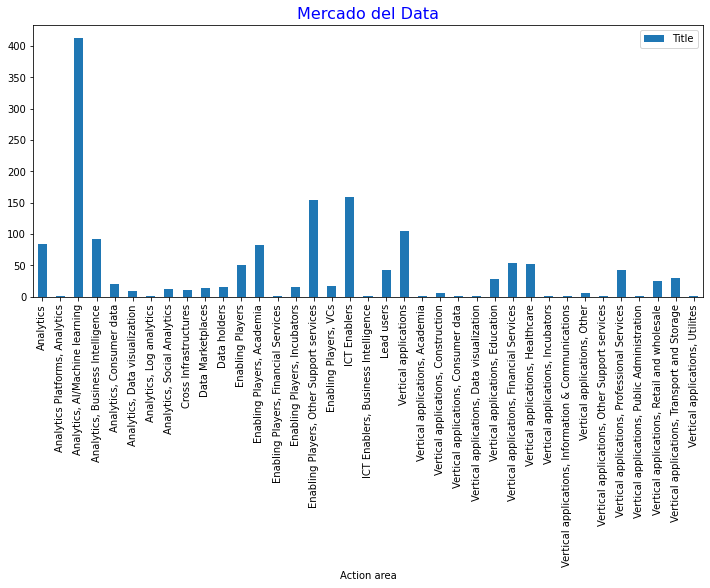

In [17]:
plot_total_area= t.plot(kind="bar", figsize=(12,5))
plt.title('Mercado del Data', color="blue", fontsize=16)
plt.savefig('grafica/histograma_mercado_data.png')

In [18]:
#Grágica de barras ordenada ordanada por cantidad en área
plot_bar = px.bar(t_orden, title= "Concentración del mercado del dato, entre 1563 empresas")
plot_bar.show()
plt.savefig('grafica/mercado_data_ordenado.png')

<Figure size 432x288 with 0 Axes>

In [20]:
t.index

Index(['Analytics', 'Analytics Platforms, Analytics',
       'Analytics, AI/Machine learning', 'Analytics, Business Intelligence',
       'Analytics, Consumer data', 'Analytics, Data visualization',
       'Analytics, Log analytics', 'Analytics, Social Analytics',
       'Cross Infrastructures', 'Data Marketplaces', 'Data holders',
       'Enabling Players', 'Enabling Players, Academia',
       'Enabling Players, Financial Services', 'Enabling Players, Incubators',
       'Enabling Players, Other Support services', 'Enabling Players, VCs',
       'ICT Enablers', 'ICT Enablers, Business Intelligence', 'Lead users',
       'Vertical applications', 'Vertical applications, Academia',
       'Vertical applications, Construction',
       'Vertical applications, Consumer data',
       'Vertical applications, Data visualization',
       'Vertical applications, Education',
       'Vertical applications, Financial Services',
       'Vertical applications, Healthcare',
       'Vertical applicatio

In [20]:
#, values='Title', color='Title'
total_area
fig_t= px.treemap(total_area, path=['Action area', 'Title'],values='Title',title= "Concentración de mercado, treemap" )
fig_t.show()
fig_t.write_html("grafica/treemap_data.html")

In [21]:
total_area.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Action area  37 non-null     object
 1   Title        37 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 720.0+ bytes


In [22]:
df.columns

Index(['Title', 'Last update', 'Geolocation', 'Action area', 'website',
       'Post date'],
      dtype='object')

In [23]:
summary = df.groupby('Action area')['Geolocation'].nunique()
df_f = pd.DataFrame({'Action_area':summary.index, 'Geolocation':summary.values})
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Action_area  37 non-null     object
 1   Geolocation  37 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 720.0+ bytes


In [24]:
df_f.head(3)

,Action_area,Geolocation
0,Analytics,59
1,"Analytics Platforms, Analytics",1
2,"Analytics, AI/Machine learning",96


In [25]:
total_area.head(3)

,Action area,Title
0,Analytics,84
1,"Analytics Platforms, Analytics",1
2,"Analytics, AI/Machine learning",413


In [26]:
#Usando Merge
datas=(df_f, total_area)
df_calor= pd.concat(datas, axis=1)
df_calor.head()

,Action_area,Geolocation,Action area,Title
0,Analytics,59,Analytics,84
1,"Analytics Platforms, Analytics",1,"Analytics Platforms, Analytics",1
2,"Analytics, AI/Machine learning",96,"Analytics, AI/Machine learning",413
3,"Analytics, Business Intelligence",52,"Analytics, Business Intelligence",92
4,"Analytics, Consumer data",14,"Analytics, Consumer data",21


In [30]:
df_calor.drop(['Action area'], axis='columns', inplace=True)


In [31]:
df_calor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Action_area  37 non-null     object
 1   Geolocation  37 non-null     int64 
 2   Title        37 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1016.0+ bytes


In [39]:
df_calor.head()

,Action_area,Geolocation,Title
0,Analytics,59,84
1,"Analytics Platforms, Analytics",1,1
2,"Analytics, AI/Machine learning",96,413
3,"Analytics, Business Intelligence",52,92
4,"Analytics, Consumer data",14,21


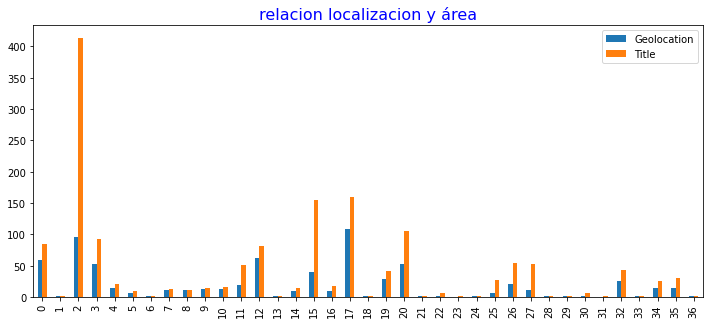

In [40]:

plot_calor= df_calor.plot(kind="bar", figsize=(12,5))
plt.title('relacion localizacion y área', color="blue", fontsize=16)
plt.savefig('grafica/histograma_geo_title.png')

In [42]:
# Geolocalizción 

In [43]:
#DF con nan eliminados de geolocalitation
geo_na=df.dropna()
geo_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1335 entries, 26 to 1562
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Title        1335 non-null   object        
 1   Last update  1335 non-null   datetime64[ns]
 2   Geolocation  1335 non-null   object        
 3   Action area  1335 non-null   object        
 4   website      1335 non-null   object        
 5   Post date    1335 non-null   datetime64[ns]
dtypes: datetime64[ns](2), object(4)
memory usage: 73.0+ KB


In [44]:
#Elimino las fechas, que para este tema no aportan 
geo_na.drop(['website', 'Last update', 'Post date'], axis='columns', inplace=True)

In [45]:
#Añado columnas con valores de loc, lat 
geo_na['valores']= geo_na.Geolocation.str[7:-1]
geo_na.columns

Index(['Title', 'Geolocation', 'Action area', 'valores'], dtype='object')

In [46]:
#La columna la separo, como un nuevo df y le cambio los nombres 
df_geo1= geo_na.valores.str.split(' ', expand=True).rename(columns={0:'lon', 1:'lat'})
df_geo1.tail()

,lon,lat
1558,-0.1245724,51.5118003
1559,-0.1277583,51.5073509
1560,-4.251806,55.864237
1561,2.1376299,41.3843763
1562,-3.1766739,55.950223


In [47]:
datas=(geo_na, df_geo1,)
df_geo= pd.concat(datas, axis=1)
df_geo.columns

Index(['Title', 'Geolocation', 'Action area', 'valores', 'lon', 'lat'], dtype='object')

In [48]:
df_geo['lat']=df_geo['lat'].astype(float)
df_geo['lon']=df_geo['lon'].astype(float)
df_geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1335 entries, 26 to 1562
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        1335 non-null   object 
 1   Geolocation  1335 non-null   object 
 2   Action area  1335 non-null   object 
 3   valores      1335 non-null   object 
 4   lon          1335 non-null   float64
 5   lat          1335 non-null   float64
dtypes: float64(2), object(4)
memory usage: 73.0+ KB


In [49]:
df_geo.head()

,Title,Geolocation,Action area,valores,lon,lat
26,Auquan,POINT (-3.435973 55.378051),"Vertical applications, Financial Services",-3.435973 55.378051,-3.435973,55.378051
28,HT2 Labs,POINT (-3.435973 55.378051),"Vertical applications, Education",-3.435973 55.378051,-3.435973,55.378051
29,Fluency,POINT (-3.435973 55.378051),"Vertical applications, Education",-3.435973 55.378051,-3.435973,55.378051
37,V7,POINT (-3.435973 55.378051),"Vertical applications, Education",-3.435973 55.378051,-3.435973,55.378051
44,AttendApp,POINT (-3.435973 55.378051),"Vertical applications, Other",-3.435973 55.378051,-3.435973,55.378051


In [85]:
#Gráfica de concentración por nombre. 
fig_m = px.scatter_mapbox(df_geo, lat="lat", lon="lon",  hover_data=["Title", "Action area"],
                        color_discrete_sequence=['#FB0D0D'], zoom=3, height=300)
fig_m.update_layout(mapbox_style="open-street-map")
fig_m.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig_m.show()
fig_t.write_html("grafica/concentracion_mapa.html")